# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image
import sys
import math
import random
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from torch.utils.data import TensorDataset, ConcatDataset
import random
from torchvision import datasets
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import confusion_matrix
import seaborn as sn

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Prepration

## animal10

In [ ]:
# this cell is regarding the aumentation and normalization with the stats of data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.RandomRotation(degrees=45),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2)),
    # transforms.RandomAffine(degrees=0, translate=(0.15, 0.15)),
    # # transforms.RandomResizedCrop(size=(224, 224), scale=(0.5, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/animal10/raw-img", transform= transform)

In [ ]:
# this cell is spliting dataset to train and test
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
test_split = 0.2
dataset_size = len(dataset)
test_size = int(test_split * dataset_size)
train_size = dataset_size - test_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [ ]:
# this cell is spliting train to train and val
val_split = 0.2
train_size = len(train_dataset)
val_size = int(val_split * train_size)
train_size = train_size - val_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [ ]:
# Define the data loaders for the train and test sets
train_loader = DataLoader(train_dataset, batch_size=128, shuffle= True,
                          drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle= True,
                        drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle= True,
                         drop_last=True)

## DogsAndCats

In [ ]:
# this cell is regarding the aumentation and normalization with the stats of data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/training_set", transform= transform)
test_dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/test_set", transform= transform)
train_loader = DataLoader(train_dataset, batch_size=128, drop_last=True, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=128, drop_last=True, shuffle= True)

## animal90

In [ ]:
# this cell is regarding the aumentation and normalization with the stats of data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/animal90/animals", transform= transform)

In [ ]:
# this cell is spliting dataset to train and test
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
test_split = 0.2
dataset_size = len(dataset)
test_size = int(test_split * dataset_size)
train_size = dataset_size - test_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [ ]:
# this cell is spliting train to train and val
val_split = 0.2
train_size = len(train_dataset)
val_size = int(val_split * train_size)
train_size = train_size - val_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [ ]:
# Define the data loaders for the train and test sets
train_loader = DataLoader(train_dataset, batch_size=128, shuffle= True,
                          drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle= True,
                        drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle= True,
                         drop_last=True)

# Load Result Resnet-18

## Load for animal10

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal10/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal10/loss_resnet18.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

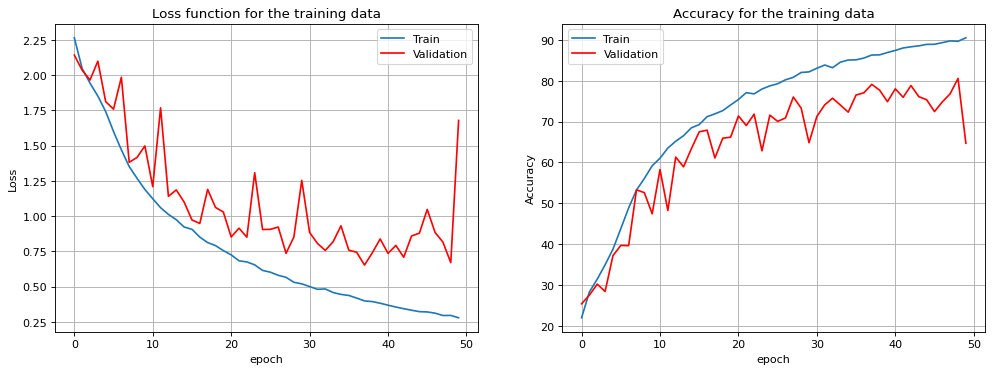

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[49]}")
print(f"Loss of the network on the test images is: {loss_test[49]}")

Accuracy of the network on the test images is: 65.3201219512195
Loss of the network on the test images is: 1.4099180698394775


In [ ]:
# Load model
model_save_name = 'resnet18.pt'
path = f"/content/drive/MyDrive/projectDataset/animal10/{model_save_name}"
model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

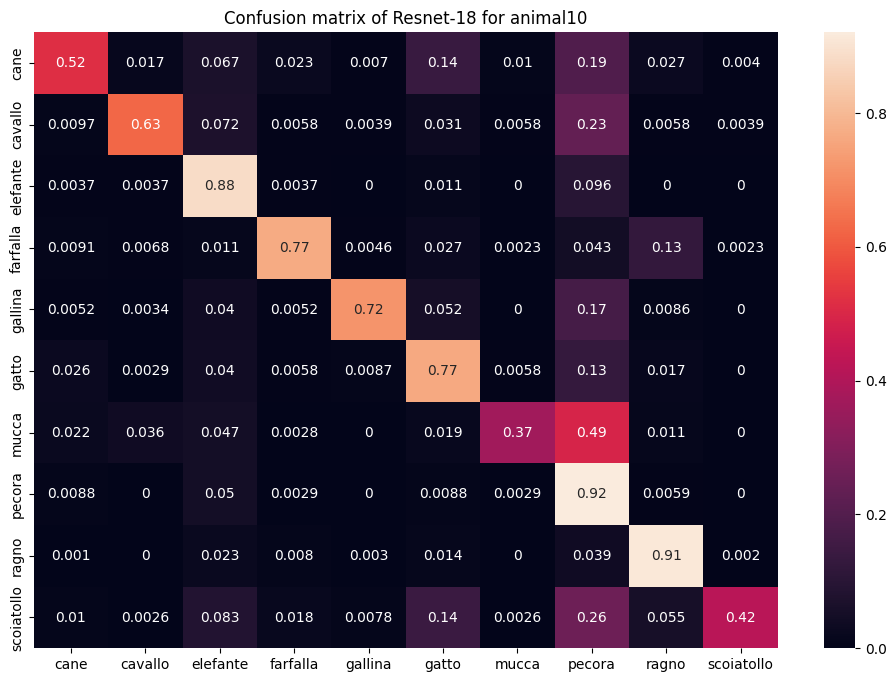

In [ ]:
# constant for classes
classes = ('cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca',
           'pecora', 'ragno', 'scoiatollo')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,8))
plt.title('Confusion matrix of Resnet-18 for animal10')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')

Recall Score is: 0.6916993896561396
Precision Score is : 0.7553944094028614
F1 measure is: 0.6664319886769501


## Load for Animal 90

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/ResNet/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/ResNet/loss_resnet18.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

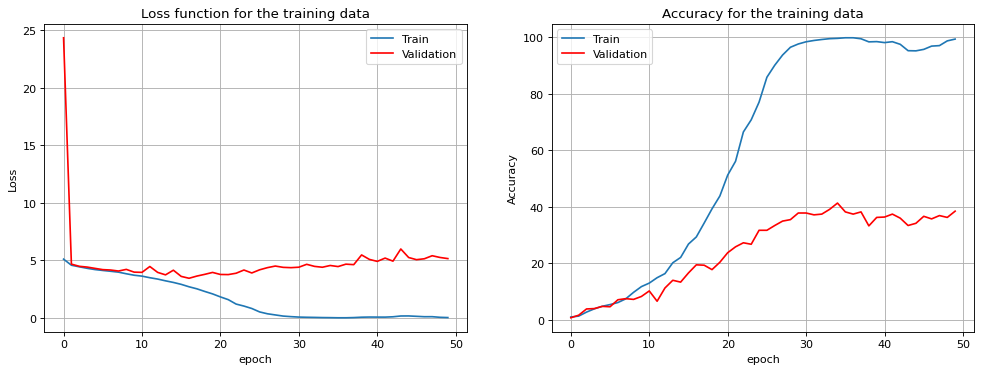

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test}")
print(f"Loss of the network on the test images is: {loss_test}")

Accuracy of the network on the test images is: 41.015625
Loss of the network on the test images is: 4.462879657745361


In [ ]:
# Load model
model_save_name = 'resnet18.pt'
path = f"/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/ResNet/resnet18.pt"
model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 90)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in test_loader:
      output = model(inputs) # Feed Network

      # output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
      # y_pred.extend(output) # Save Prediction
      output = output.max(1, keepdim=True)[1]
      for i in output:
          y_pred.append(i.item())
      
      labels = labels.data.cpu().numpy()
      y_true.extend(labels) # Save Truth

In [ ]:
recall = recall_score(y_true, y_pred, average='micro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.177734375
Precision Score is : 0.1797543505876839
F1 measure is: 0.17252806930332468
Accuracy Score: 0.177734375


## Load for DogsAndCats

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/loss_resnet18.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

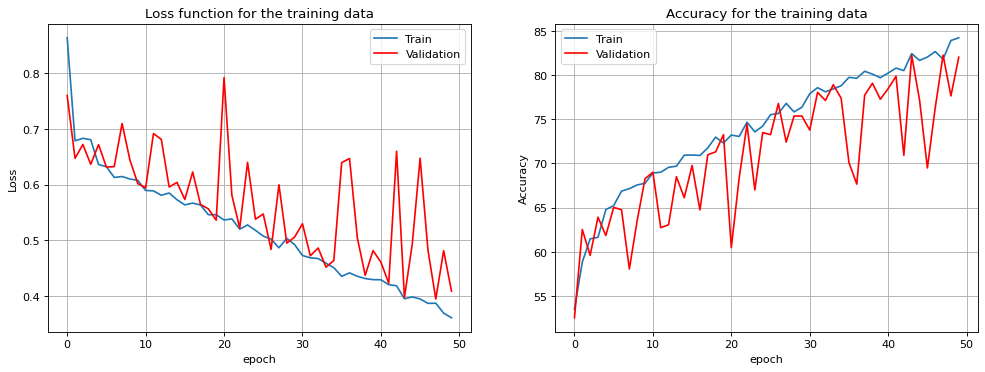

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[0]}")
print(f"Loss of the network on the test images is: {loss_test[0]}")

Accuracy of the network on the test images is: 80.88541666666667
Loss of the network on the test images is: 0.4171028435230255


In [ ]:
# Load Model
path = f"/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/resnet18.pt"
model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

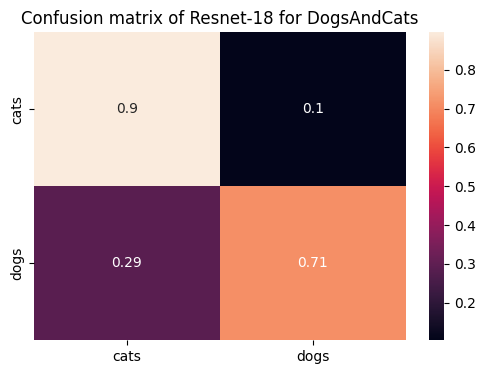

In [ ]:
# constant for classes
classes = ('cats', 'dogs')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (6,4))
plt.title('Confusion matrix of Resnet-18 for DogsAndCats')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')

Recall Score is: 0.8050217391304348
Precision Score is : 0.8184524721430687
F1 measure is: 0.805794363726012


# Load Result ShuffleNet-V2

## Load for animal10

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/accuracy_shufflenet_v2_x1_0.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/loss_shufflenet_v2_x1_0.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

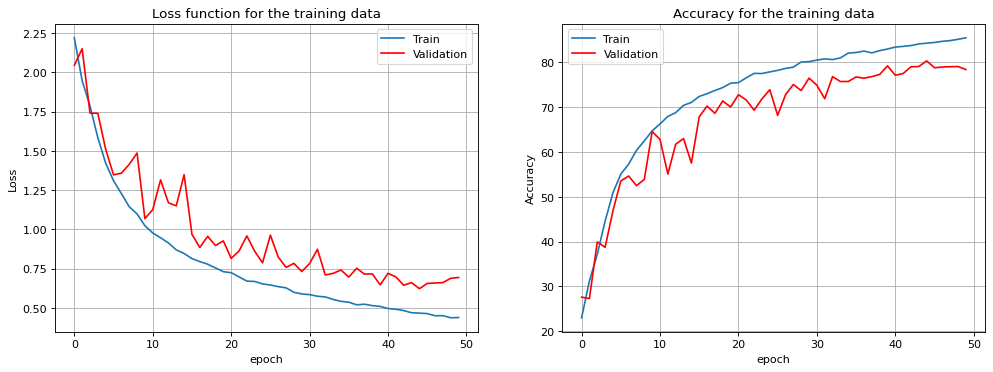

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[49]}")
print(f"Loss of the network on the test images is: {loss_test[49]}")

Accuracy of the network on the test images is: 77.87728658536585
Loss of the network on the test images is: 0.9017049670219421


In [ ]:
# Load model
model_save_name = 'shufflenet_v2_x1_0.pt'
path = f"/content/drive/MyDrive/projectDataset/animal10/{model_save_name}" 
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

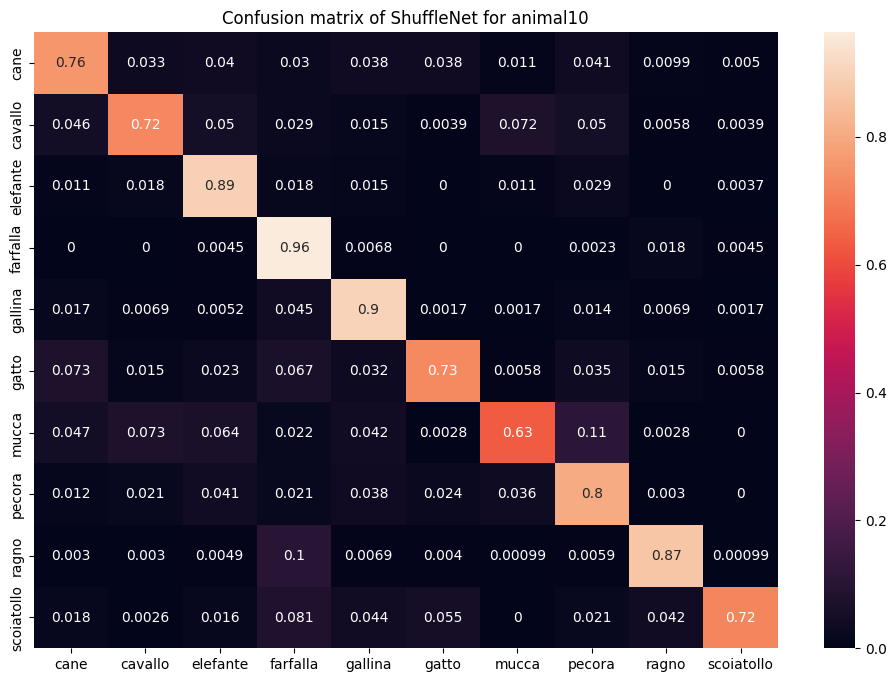

In [ ]:
# constant for classes
classes = ('cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca',
           'pecora', 'ragno', 'scoiatollo')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,8))
plt.title('Confusion matrix of ShuffleNet for animal10')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')

Recall Score is: 0.7991607935666296
Precision Score is : 0.7898012588328575


In [ ]:
recall = recall_score(y_true, y_pred, average='micro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.8100228658536586
Precision Score is : 0.798378598499335
F1 measure is: 0.7917573755024009
Accuracy Score: 0.8100228658536586


## Load for animal90

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/ResNet/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/ResNet/loss_resnet18.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

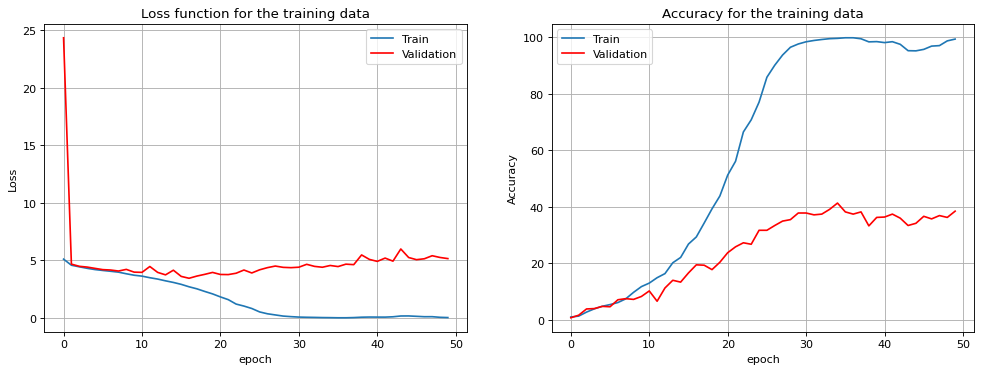

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test}")
print(f"Loss of the network on the test images is: {loss_test}")

Accuracy of the network on the test images is: 36.81640625
Loss of the network on the test images is: 5.4550973773002625


In [ ]:
# Load model
model_save_name = 'shufflenet_v2_x1_0.pt'
path = f"/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/shuffleNet/shufflenet_v2_x1_0.pt"
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 90)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
recall = recall_score(y_true, y_pred, average='micro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.1767578125
Precision Score is : 0.1675519217624481
F1 measure is: 0.16598770387992326
Accuracy Score: 0.1767578125


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Transfer Learning

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/SuffleNet_Transfer/accuracy_shufflenet_v2_x1_0_pretrained.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/SuffleNet_Transfer/loss_shufflenet_v2_x1_0_pretrained.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)

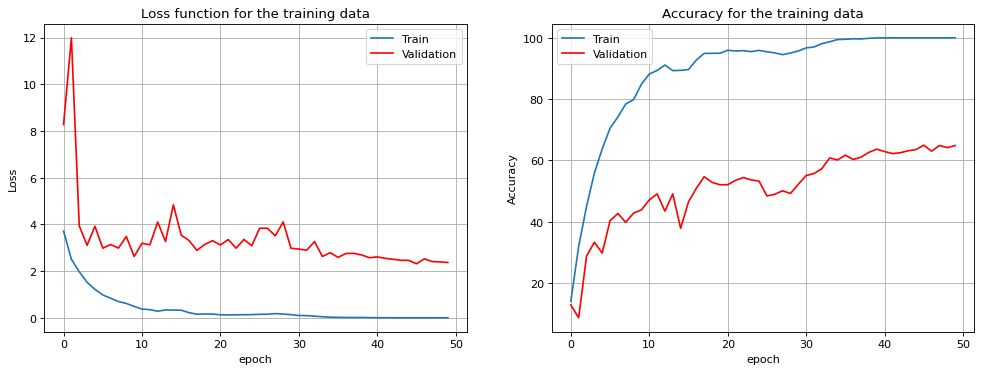

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
# Load model
path = f"/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/SuffleNet_Transfer/shufflenet_v2_x1_0_pretrained.pt"
model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 90)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
# Evaluate the model on test
model.eval()
correct_test = 0
total_test = 0
running_loss_test = 0
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss_test += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
accuracy = 100 * correct_test / total_test
loss_test = running_loss_test/len(test_loader)
print(f"Accuracy of the network on the test images is: {accuracy}")
print(f"Loss of the network on the test images is: {loss_test}")

Accuracy of the network on the test images is: 20.572916666666668
Loss of the network on the test images is: 19.08544135093689


In [ ]:
recall = recall_score(y_true, y_pred, average='micro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.1982421875
Precision Score is : 0.1907998482998483
F1 measure is: 0.19126402312695592
Accuracy Score: 0.1982421875


## Load for DogsAndCats

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/accuracy_shufflenet_v2_x1_0.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/loss_shufflenet_v2_x1_0.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

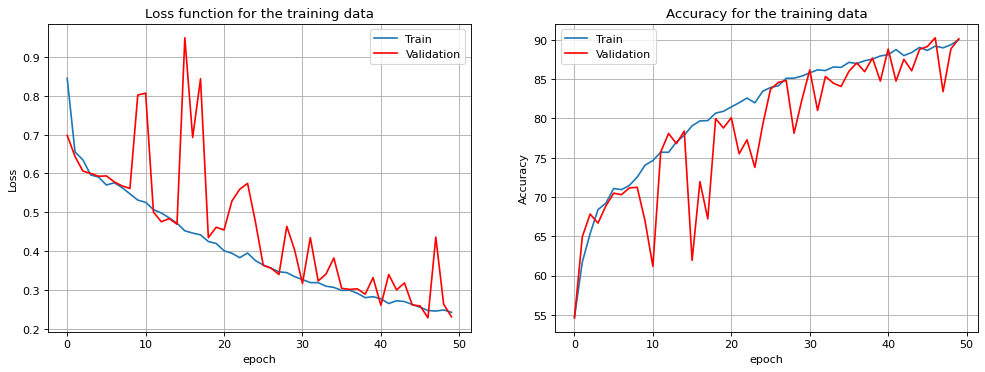

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[49]}")
print(f"Loss of the network on the test images is: {loss_test[49]}")

Accuracy of the network on the test images is: 89.63541666666667
Loss of the network on the test images is: 0.16878432035446167


In [ ]:
# Load Model
path = f"/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/shufflenet_v2_x1_0.pt"
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

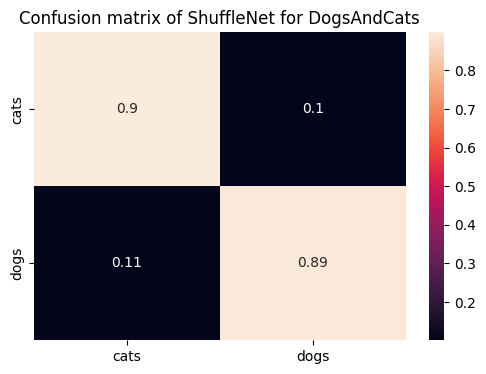

In [ ]:
# constant for classes
classes = ('cats', 'dogs')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (6,4))
plt.title('Confusion matrix of ShuffleNet for DogsAndCats')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')

Recall Score is: 0.8951521739130435
Precision Score is : 0.8951182452811117
F1 measure is: 0.8951349656359957


# Load Result MobileNet-V2

## Load for animal10

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

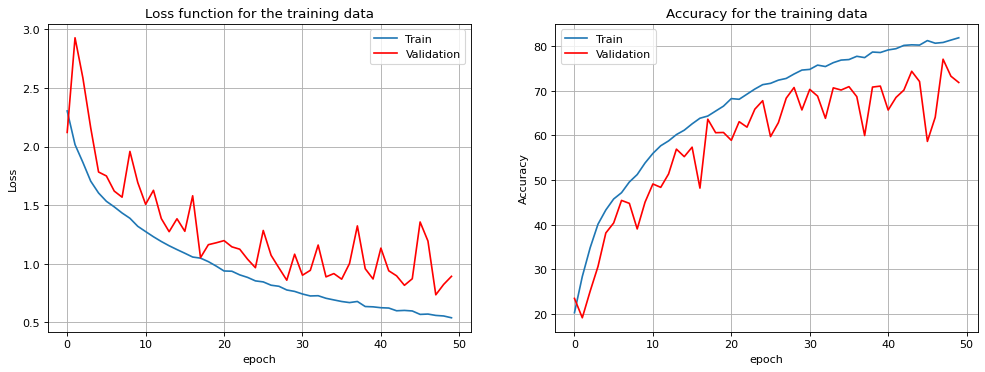

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[49]}")
print(f"Loss of the network on the test images is: {loss_test[49]}")

Accuracy of the network on the test images is: 72.265625
Loss of the network on the test images is: 0.8199116587638855


In [ ]:
# Load model
model = torchvision.models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 10)
model_save_name = 'mobilenet_v2.pt'
path = f"/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/mobilenet_v2_2.pt" 
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

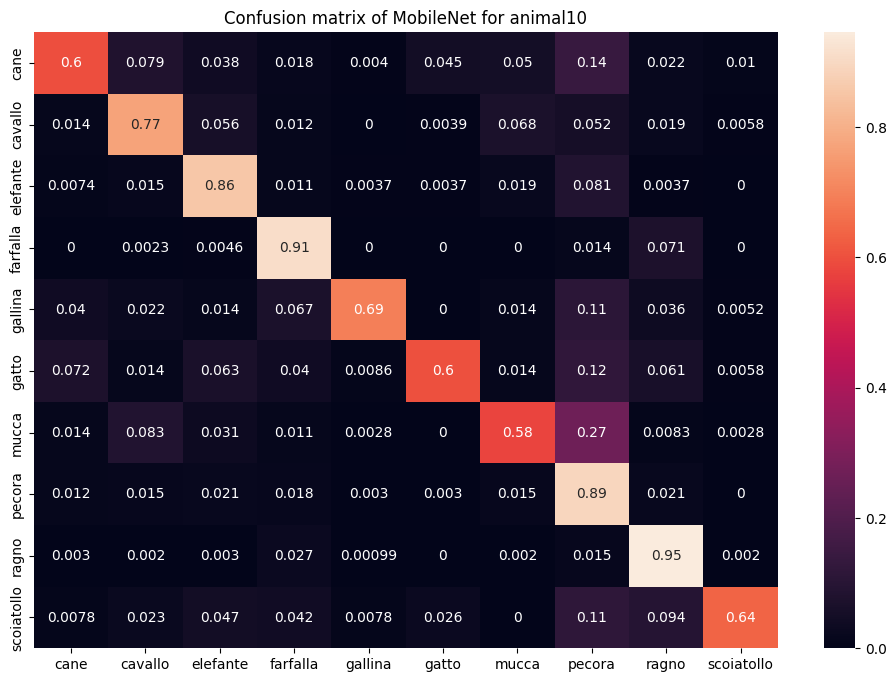

In [ ]:
# constant for classes
classes = ('cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca',
           'pecora', 'ragno', 'scoiatollo')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,8))
plt.title('Confusion matrix of MobileNet for animal10')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')

Recall Score is: 0.7476964145448861
Precision Score is : 0.757691000650613


## Load for animal90

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

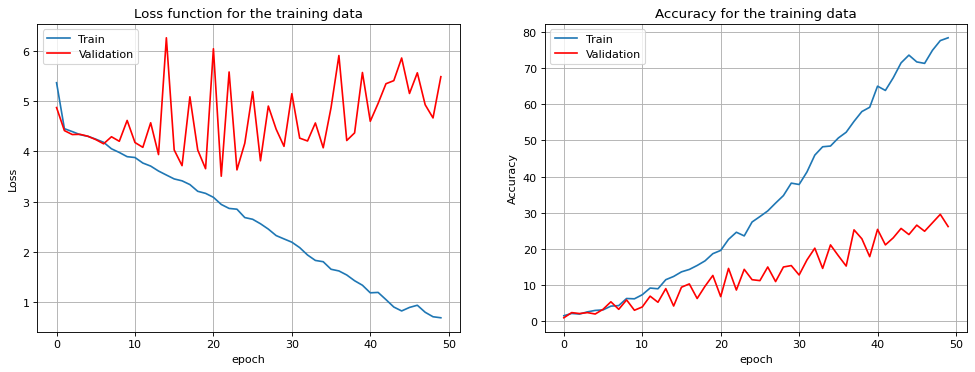

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test}")
print(f"Loss of the network on the test images is: {loss_test}")

In [ ]:
# Load model
model_save_name = 'mobilenet_v2.pt'
path = '/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet/mobilenet_v2.pt'
model = torchvision.models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 90)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.13171898974014556
Precision Score is : 0.13768901223567726
F1 measure is: 0.1277702783503138
Accuracy Score: 0.1357421875


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Transfer - animal90

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet_Transfer/accuracy_mobilenet_v2_pretrained.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet_Transfer/loss_mobilenet_v2_pretrained.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

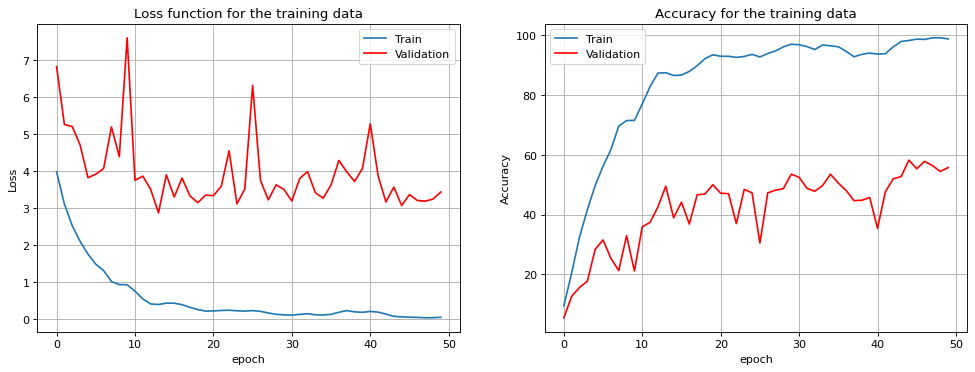

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test}")
print(f"Loss of the network on the test images is: {loss_test}")

Accuracy of the network on the test images is: []
Loss of the network on the test images is: 3.787807136774063


In [ ]:
# Load model
model_save_name = 'mobilenet_v2.pt'
path = '/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet_Transfer/mobilenet_v2_pretrained.pt'
model = torchvision.models.mobilenet_v2(pretrained= True)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 90)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.16797773667871707
Precision Score is : 0.1728495675864097
F1 measure is: 0.16879777503695936
Accuracy Score: 0.1767578125


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Load for DogsAndCats

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train = pickle.load(fp)
    accuracy_val = pickle.load(fp)
    accuracy_test = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train = pickle.load(fp)
    loss_val = pickle.load(fp)
    loss_test = pickle.load(fp)

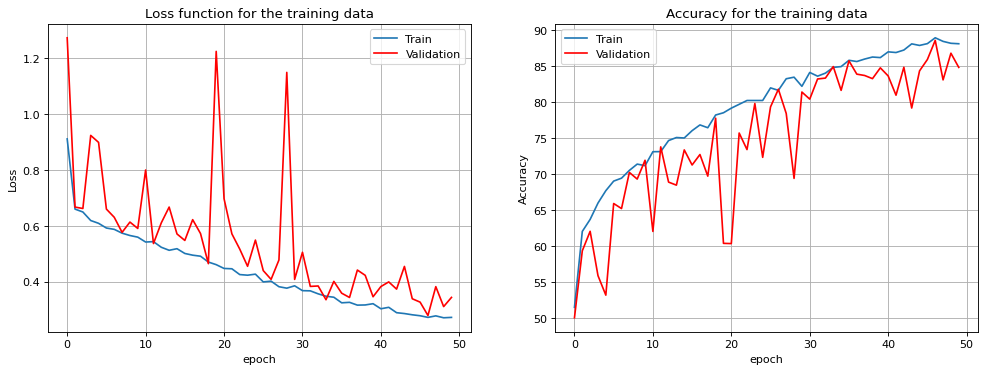

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train, label="Train")
plt.plot(loss_val, color='red', label="Validation")
plt.title('Loss function for the training data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label="Train")
plt.plot(accuracy_val, color='red', label="Validation")
plt.title('Accuracy for the training data')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
print(f"Accuracy of the network on the test images is: {accuracy_test[49]}")
print(f"Loss of the network on the test images is: {loss_test[49]}")

Accuracy of the network on the test images is: 85.0
Loss of the network on the test images is: 0.3059484660625458


In [ ]:
# Load Model
path = f"/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/mobilenet_v2.pt"
model = torchvision.models.mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 2)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
# confusion matrix
y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

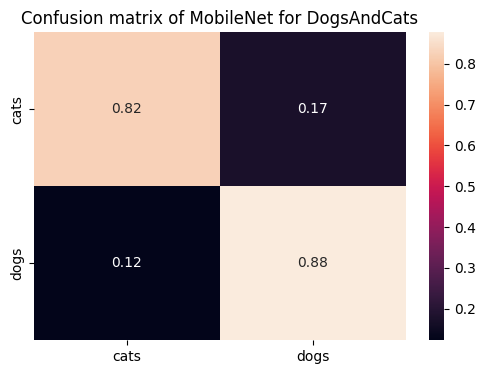

In [ ]:
# constant for classes
classes = ('cats', 'dogs')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (6,4))
plt.title('Confusion matrix of MobileNet for DogsAndCats')
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')
print(f"Loss of the network on the test images is: {loss_test[49]}")

Recall Score is: 0.851590008235686
Precision Score is : 0.8525459688826025
F1 measure is: 0.8514657577268615
Accuracy Score: 0.8515625
Loss of the network on the test images is: 0.3059484660625458


# Final animal90

## resnet

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal90_v1/Resnet18/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train_resnet = pickle.load(fp)
    accuracy_val_resnet = pickle.load(fp)
    accuracy_test_resnet = pickle.load(fp)
    y_pred_resnet = pickle.load(fp)
    y_true_resnet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal90_v1/Resnet18/loss_resnet18.txt", "rb") as fp:
    loss_train_resnet = pickle.load(fp)
    loss_val_resnet = pickle.load(fp)
    loss_test_resnet = pickle.load(fp)

In [ ]:
recall = recall_score(y_true_resnet, y_pred_resnet, average='macro')
precision = precision_score(y_true_resnet, y_pred_resnet, average='macro')
f1 = f1_score(y_true_resnet, y_pred_resnet, average='macro')
accuracy = accuracy_score(y_true_resnet, y_pred_resnet)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.3644682831692635
Precision Score is : 0.4439971506809613
F1 measure is: 0.3554949338946431
Accuracy Score: 0.359375


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## shuffleNet

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal90_v1/ShuffleNet/accuracy_shuffleNet.txt", "rb") as fp:
    accuracy_train_shuffleNet = pickle.load(fp)
    accuracy_val_shuffleNet = pickle.load(fp)
    accuracy_test_shuffleNet = pickle.load(fp)
    y_pred_shuffleNet = pickle.load(fp)
    y_true_shuffleNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal90_v1/ShuffleNet/loss_shuffleNet.txt", "rb") as fp:
    loss_train_shuffleNet = pickle.load(fp)
    loss_val_shuffleNet = pickle.load(fp)
    loss_test_shuffleNet = pickle.load(fp)

In [ ]:
recall = recall_score(y_true_shuffleNet, y_pred_shuffleNet, average='macro')
precision = precision_score(y_true_shuffleNet, y_pred_shuffleNet, average='macro')
f1 = f1_score(y_true_shuffleNet, y_pred_shuffleNet, average='macro')
accuracy = accuracy_score(y_true_shuffleNet, y_pred_shuffleNet)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.3455668568903863
Precision Score is : 0.38526111938013813
F1 measure is: 0.3431008355057984
Accuracy Score: 0.341796875


## MobileNet

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal90_v1/MobileNet/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train_mobileNet = pickle.load(fp)
    accuracy_val_mobileNet = pickle.load(fp)
    accuracy_test_mobileNet = pickle.load(fp)
    y_pred_mobileNet = pickle.load(fp)
    y_true_mobileNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal90_v1/MobileNet/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train_mobileNet = pickle.load(fp)
    loss_val_mobileNet = pickle.load(fp)
    loss_test_mobileNet = pickle.load(fp)

In [ ]:
recall = recall_score(y_true_mobileNet, y_pred_mobileNet, average='macro')
precision = precision_score(y_true_mobileNet, y_pred_mobileNet, average='macro')
f1 = f1_score(y_true_mobileNet, y_pred_mobileNet, average='macro')
accuracy = accuracy_score(y_true_mobileNet, y_pred_mobileNet)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')
print(f'Loss MobileNet: {loss_test_mobileNet}')

Recall Score is: 0.3390204639224247
Precision Score is : 0.34167861605580907
F1 measure is: 0.3275594468436082
Accuracy Score: 0.3369140625
Loss MobileNet: 4.447169244289398


## Transfer - Shuffle

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal90_v1/ShuffleNet_Pretrained/accuracy_shuffleNet_pretrained.txt", "rb") as fp:
    accuracy_train_shuffle_transfer = pickle.load(fp)
    accuracy_val_shuffle_transfer = pickle.load(fp)
    accuracy_test_shuffle_transfer = pickle.load(fp)
    y_pred_shuffle_transfer = pickle.load(fp)
    y_true_shuffle_transfer = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal90_v1/ShuffleNet_Pretrained/loss_shuffleNet_pretrained.txt", "rb") as fp:
    loss_train_shuffle_transfer = pickle.load(fp)
    loss_val_shuffle_transfer = pickle.load(fp)
    loss_test_shuffle_transfer = pickle.load(fp)

In [ ]:
recall = recall_score(y_true_shuffle_transfer, y_pred_shuffle_transfer, average='macro')
precision = precision_score(y_true_shuffle_transfer, y_pred_shuffle_transfer, average='macro')
f1 = f1_score(y_true_shuffle_transfer, y_pred_shuffle_transfer, average='macro')
accuracy = accuracy_score(y_true_shuffle_transfer, y_pred_shuffle_transfer)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.6370565935516916
Precision Score is : 0.640637133183012
F1 measure is: 0.6281873179700059
Accuracy Score: 0.634765625


## Transfer - Mobile

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal90_v1/MobileNet_Pretrained/accuracy_mobilenet_pretrained.txt", "rb") as fp:
    accuracy_train_mobile_transfer = pickle.load(fp)
    accuracy_val_mobile_transfer = pickle.load(fp)
    accuracy_test_mobile_transfer = pickle.load(fp)
    y_pred_mobile_transfer = pickle.load(fp)
    y_true_mobile_transfer = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal90_v1/MobileNet_Pretrained/loss_mobilenet_pretrained.txt", "rb") as fp:
    loss_train_mobile_transfer = pickle.load(fp)
    loss_val_mobile_transfer = pickle.load(fp)
    loss_test_mobile_transfer = pickle.load(fp)

In [ ]:
recall = recall_score(y_true_mobile_transfer, y_pred_mobile_transfer, average='macro')
precision = precision_score(y_true_mobile_transfer, y_pred_mobile_transfer, average='macro')
f1 = f1_score(y_true_mobile_transfer, y_pred_mobile_transfer, average='macro')
accuracy = accuracy_score(y_true_mobile_transfer, y_pred_mobile_transfer)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')
print(f'Loss MobileNet: {loss_test_mobileNet}')

Recall Score is: 0.4386694333262961
Precision Score is : 0.513854851241948
F1 measure is: 0.4297292873925234
Accuracy Score: 0.427734375
Loss MobileNet: 4.447169244289398


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Graphs

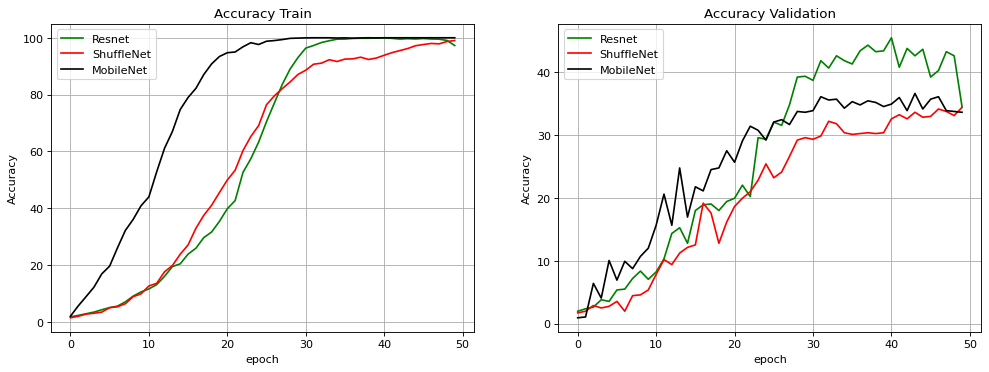

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(accuracy_train_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_train_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Train')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_val_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_val_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

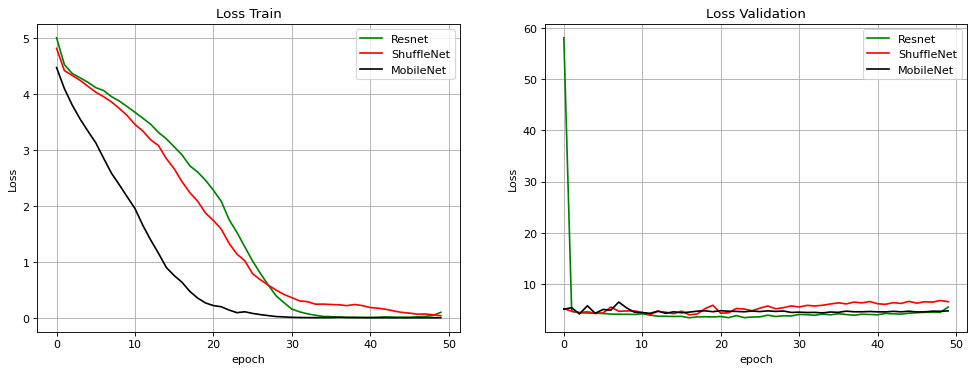

In [ ]:
# plot loss
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train_resnet, color= 'green', label="Resnet")
plt.plot(loss_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_train_mobileNet, color='black', label="MobileNet")
plt.title('Loss Train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_val_resnet, color= 'green', label="Resnet")
plt.plot(loss_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_val_mobileNet, color='black', label="MobileNet")
plt.title('Loss Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet_Transfer/accuracy_mobilenet_v2_pretrained.txt", "rb") as fp:
    accuracy_train_mobile_transfer_v2 = pickle.load(fp)
    accuracy_val_mobile_transfer_v2 = pickle.load(fp)
    accuracy_test_mobile_transfer_v2 = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Animal_90_New_MobileNet/Result_90/MobileNet_Transfer/loss_mobilenet_v2_pretrained.txt", "rb") as fp:
    loss_train_mobile_transfer_v2 = pickle.load(fp)
    loss_val_mobile_transfer_v2 = pickle.load(fp)
    loss_test_mobile_transfer_v2 = pickle.load(fp)

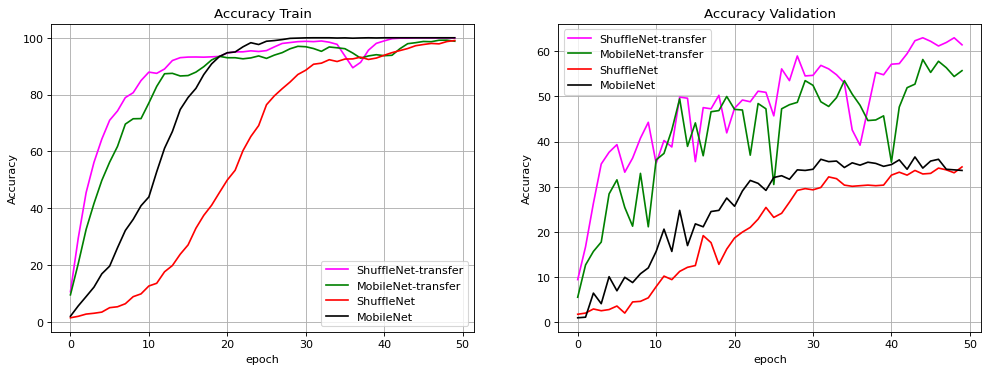

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(accuracy_train_shuffle_transfer, color= 'magenta', label="ShuffleNet-transfer")
plt.plot(accuracy_train_mobile_transfer_v2, color= 'green', label="MobileNet-transfer")
plt.plot(accuracy_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_train_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Train')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_val_shuffle_transfer, color= 'magenta', label="ShuffleNet-transfer")
plt.plot(accuracy_val_mobile_transfer_v2, color= 'green', label="MobileNet-transfer")
plt.plot(accuracy_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_val_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

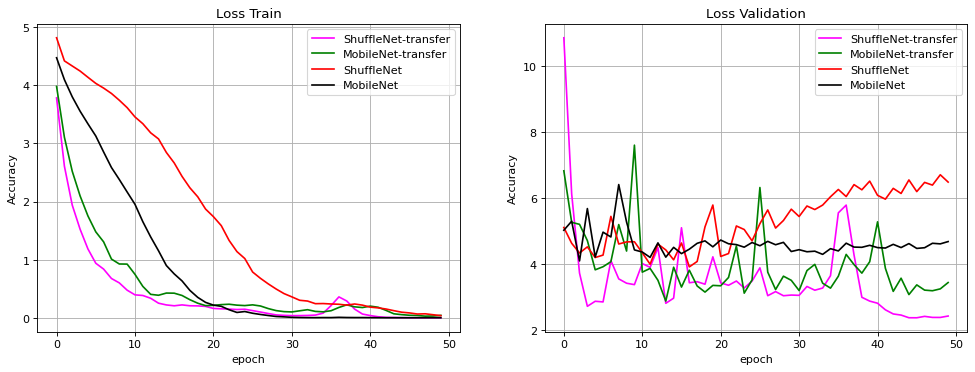

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train_shuffle_transfer, color= 'magenta', label="ShuffleNet-transfer")
plt.plot(loss_train_mobile_transfer_v2, color= 'green', label="MobileNet-transfer")
plt.plot(loss_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_train_mobileNet, color='black', label="MobileNet")
plt.title('Loss Train')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_val_shuffle_transfer, color= 'magenta', label="ShuffleNet-transfer")
plt.plot(loss_val_mobile_transfer_v2, color= 'green', label="MobileNet-transfer")
plt.plot(loss_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_val_mobileNet, color='black', label="MobileNet")
plt.title('Loss Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

# Final dogsAndCats

In [ ]:
import pickle
with open("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train_resnet = pickle.load(fp)
    accuracy_val_resnet = pickle.load(fp)
    accuracy_test_resnet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/loss_resnet18.txt", "rb") as fp:
    loss_train_resnet = pickle.load(fp)
    loss_val_resnet = pickle.load(fp)
    loss_test_resnet = pickle.load(fp)

In [ ]:
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/accuracy_shufflenet_v2_x1_0.txt", "rb") as fp:
    accuracy_train_shuffleNet = pickle.load(fp)
    accuracy_val_shuffleNet = pickle.load(fp)
    accuracy_test_shuffleNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/loss_shufflenet_v2_x1_0.txt", "rb") as fp:
    loss_train_shuffleNet = pickle.load(fp)
    loss_val_shuffleNet = pickle.load(fp)
    loss_test_shuffleNet = pickle.load(fp)

In [ ]:
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train_mobileNet = pickle.load(fp)
    accuracy_val_mobileNet = pickle.load(fp)
    accuracy_test_mobileNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train_mobileNet = pickle.load(fp)
    loss_val_mobileNet = pickle.load(fp)
    loss_test_mobileNet = pickle.load(fp)

## Graphs

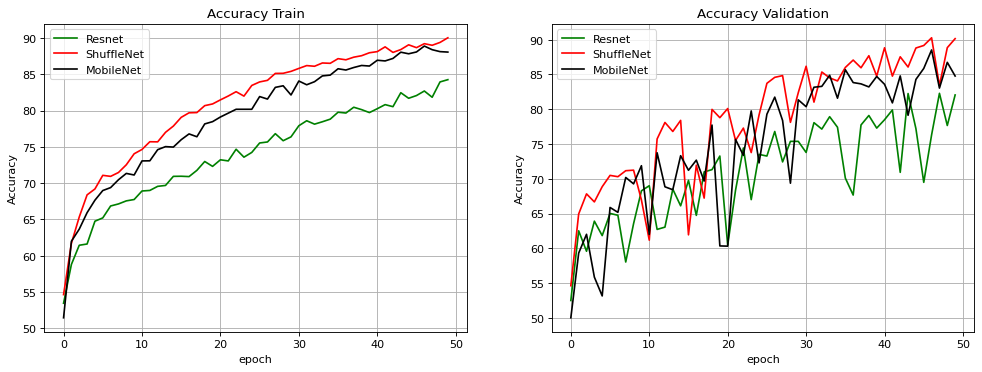

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(accuracy_train_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_train_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Train')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_val_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_val_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

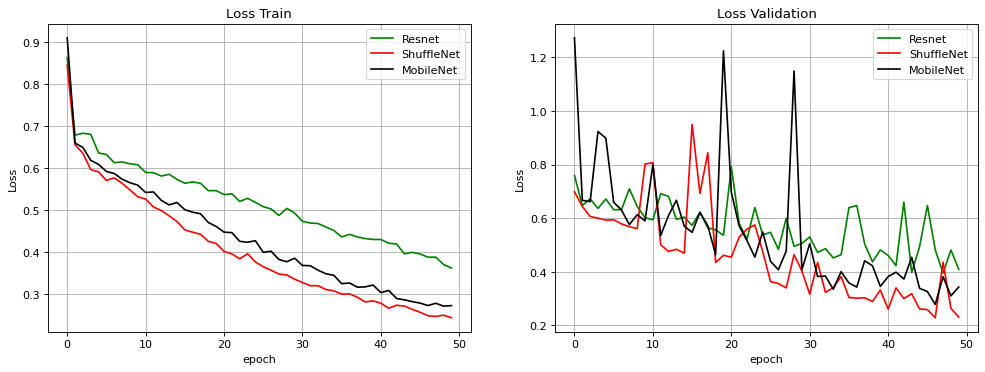

In [ ]:
# plot loss
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train_resnet, color= 'green', label="Resnet")
plt.plot(loss_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_train_mobileNet, color='black', label="MobileNet")
plt.title('Loss Train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_val_resnet, color= 'green', label="Resnet")
plt.plot(loss_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_val_mobileNet, color='black', label="MobileNet")
plt.title('Loss Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

#  Final animal10

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/animal10/accuracy_resnet18.txt", "rb") as fp:
    accuracy_train_resnet = pickle.load(fp)
    accuracy_val_resnet = pickle.load(fp)
    accuracy_test_resnet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/animal10/loss_resnet18.txt", "rb") as fp:
    loss_train_resnet = pickle.load(fp)
    loss_val_resnet = pickle.load(fp)
    loss_test_resnet = pickle.load(fp)

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/accuracy_shufflenet_v2_x1_0.txt", "rb") as fp:
    accuracy_train_shuffleNet = pickle.load(fp)
    accuracy_val_shuffleNet = pickle.load(fp)
    accuracy_test_shuffleNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/loss_shufflenet_v2_x1_0.txt", "rb") as fp:
    loss_train_shuffleNet = pickle.load(fp)
    loss_val_shuffleNet = pickle.load(fp)
    loss_test_shuffleNet = pickle.load(fp)

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/accuracy_mobilenet_v2.txt", "rb") as fp:
    accuracy_train_mobileNet = pickle.load(fp)
    accuracy_val_mobileNet = pickle.load(fp)
    accuracy_test_mobileNet = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/Animal_10/loss_mobilenet_v2.txt", "rb") as fp:
    loss_train_mobileNet = pickle.load(fp)
    loss_val_mobileNet = pickle.load(fp)
    loss_test_mobileNet = pickle.load(fp)

## Graphs

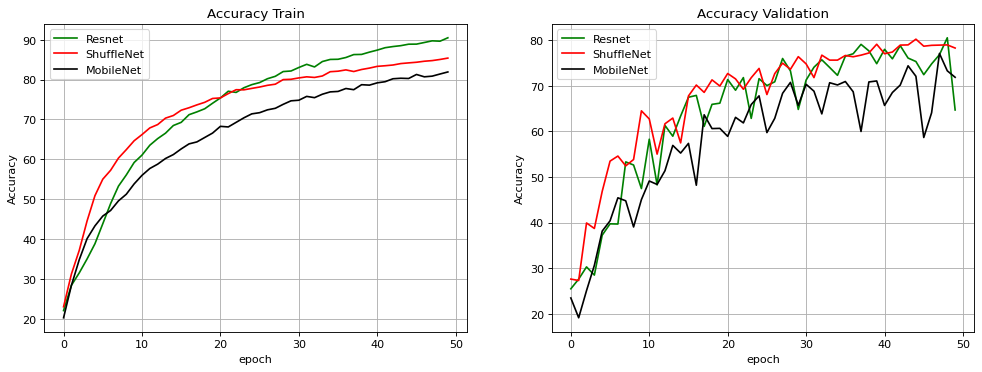

In [ ]:
# plot train and val and test accuracy 
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(accuracy_train_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_train_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Train')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_val_resnet, color= 'green', label="Resnet")
plt.plot(accuracy_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(accuracy_val_mobileNet, color='black', label="MobileNet")
plt.title('Accuracy Validation')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

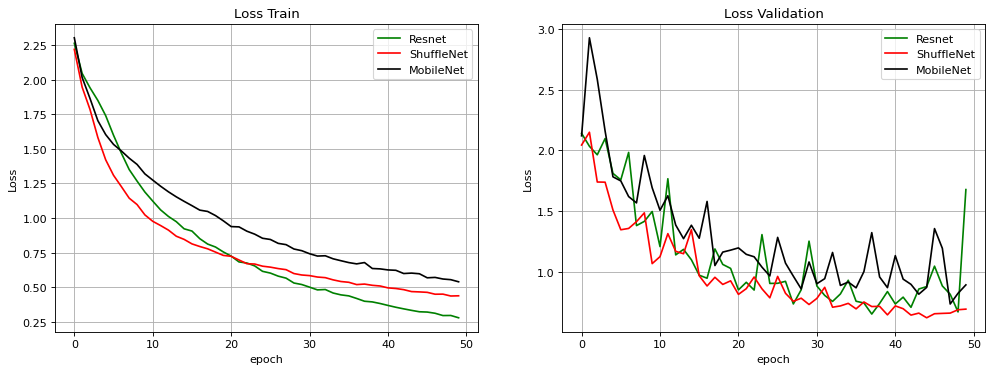

In [ ]:
# plot loss
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train_resnet, color= 'green', label="Resnet")
plt.plot(loss_train_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_train_mobileNet, color='black', label="MobileNet")
plt.title('Loss Train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_val_resnet, color= 'green', label="Resnet")
plt.plot(loss_val_shuffleNet, color='red', label="ShuffleNet")
plt.plot(loss_val_mobileNet, color='black', label="MobileNet")
plt.title('Loss Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

## Graphs comparing lr=0.005 and lr=0.01 

In [ ]:
# save accuracy and loss
import pickle
with open("/content/drive/MyDrive/projectDataset/tunedLr/accuracy_shuffleNet_tunedlr.txt", "rb") as fp:
    accuracy_train_shuffleNet_tunedlr = pickle.load(fp)
    accuracy_val_shuffleNet_tunedlr = pickle.load(fp)
    accuracy_test_shuffleNet_tunedlr = pickle.load(fp)
    y_pred_shuffleNet_tunedlr = pickle.load(fp)
    y_true_shuffleNet_tunedlr = pickle.load(fp)

with open("/content/drive/MyDrive/projectDataset/tunedLr/loss_shuffleNet_tunedlr.txt", "rb") as fp:
    loss_train_shuffleNet_tunedlr = pickle.load(fp)
    loss_val_shuffleNet_tunedlr = pickle.load(fp)
    loss_test_shuffleNet_tunedlr = pickle.load(fp)

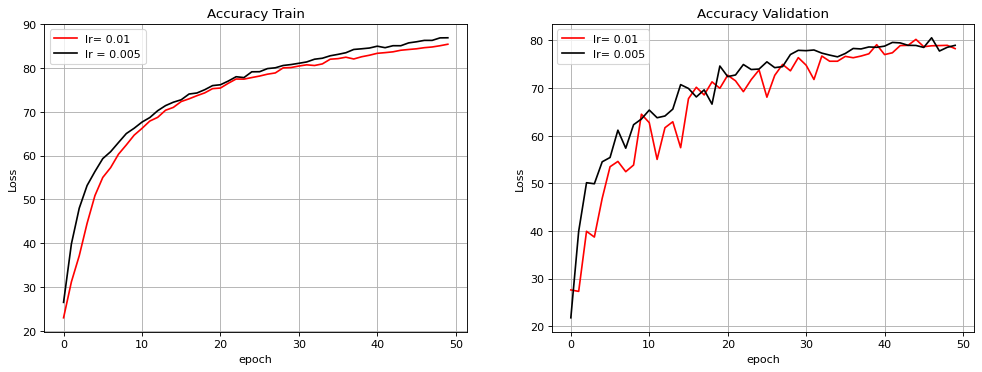

In [ ]:
# plot loss
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(accuracy_train_shuffleNet, color='red', label="lr= 0.01")
plt.plot(accuracy_train_shuffleNet_tunedlr, color='black', label="lr = 0.005")
plt.title('Accuracy Train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_val_shuffleNet, color='red', label="lr= 0.01")
plt.plot(accuracy_val_shuffleNet_tunedlr, color='black', label="lr= 0.005")
plt.title('Accuracy Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

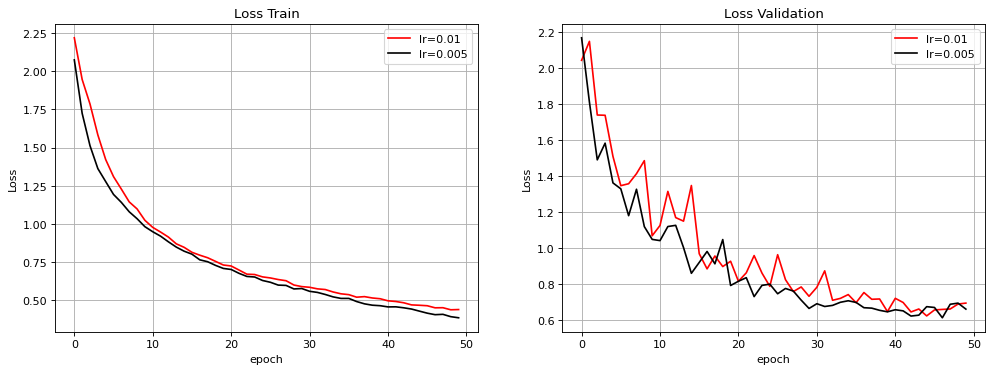

In [ ]:
# plot loss
plt.figure(figsize=(15, 5), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(loss_train_shuffleNet, color='red', label="lr=0.01")
plt.plot(loss_train_shuffleNet_tunedlr, color='black', label="lr=0.005")
plt.title('Loss Train')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_val_shuffleNet, color='red', label="lr=0.01")
plt.plot(loss_val_shuffleNet_tunedlr, color='black', label="lr=0.005")
plt.title('Loss Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

results of shuffleNet for lr=0.005

In [ ]:
recall = recall_score(y_true_shuffleNet_tunedlr, y_pred_shuffleNet_tunedlr, average='macro')
precision = precision_score(y_true_shuffleNet_tunedlr, y_pred_shuffleNet_tunedlr, average='macro')
f1 = f1_score(y_true_shuffleNet_tunedlr, y_pred_shuffleNet_tunedlr, average='macro')
accuracy = accuracy_score(y_true_shuffleNet_tunedlr, y_pred_shuffleNet_tunedlr)
print(f'Recall Score is: {recall}')
print(f'Precision Score is : {precision}')
print(f'F1 measure is: {f1}')
print(f'Accuracy Score: {accuracy}')

Recall Score is: 0.7601357826712821
Precision Score is : 0.7674658733310584
F1 measure is: 0.760410126184563
Accuracy Score: 0.784375


# Tsne

In [ ]:
# this cell is regarding the aumentation and normalization with the stats of data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# dogsAndCats
train_dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/dogsAndCats/dataset/training_set", transform= transform)
train_loader = DataLoader(train_dataset, batch_size=1, drop_last=True, shuffle= True)

In [ ]:
# animal10
dataset = datasets.ImageFolder("/content/drive/MyDrive/projectDataset/animal10/raw-img", transform= transform)
train_loader = DataLoader(dataset, batch_size=1, drop_last=True, shuffle= True)

In [ ]:
path = path = f"/content/drive/MyDrive/projectDataset/Progress_Report_Animal_10_90/dogsAndCats/shufflenet_v2_x1_0.pt" 
model = torchvision.models.shufflenet_v2_x1_0(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

In [ ]:
features = nn.Sequential(*list(model.children())[:-1])

In [ ]:
y_pred = []
y_true = []
input = []
features_reps = []
cnt = 0
for inputs, labels in train_loader:
    # input.append(torch.flatten(inputs))
    output = model(inputs) # Feed Network
    feature_rep = features(inputs)
    features_reps.append(torch.flatten(feature_rep))

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
    
    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth
    if(cnt == 300):
        break
    cnt += 1    

In [ ]:
input_new = []
features_new = []
for i in range(len(features_reps)):
    # input_new.append(input[i].detach().cpu().numpy())
    features_new.append(features_reps[i].detach().cpu().numpy())

# X = np.array(input_new)   
Features = np.array(features_new)
Y = np.array(y_pred) 

In [ ]:
# print(X.shape)
print(Y.shape)
print(Features.shape)

(301,)
(301, 50176)


In [ ]:
from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2, init='random').fit_transform(X)
Features_embedded = TSNE(n_components=2, init='random').fit_transform(Features)

In [ ]:
X_embedded.shape

(301, 2)

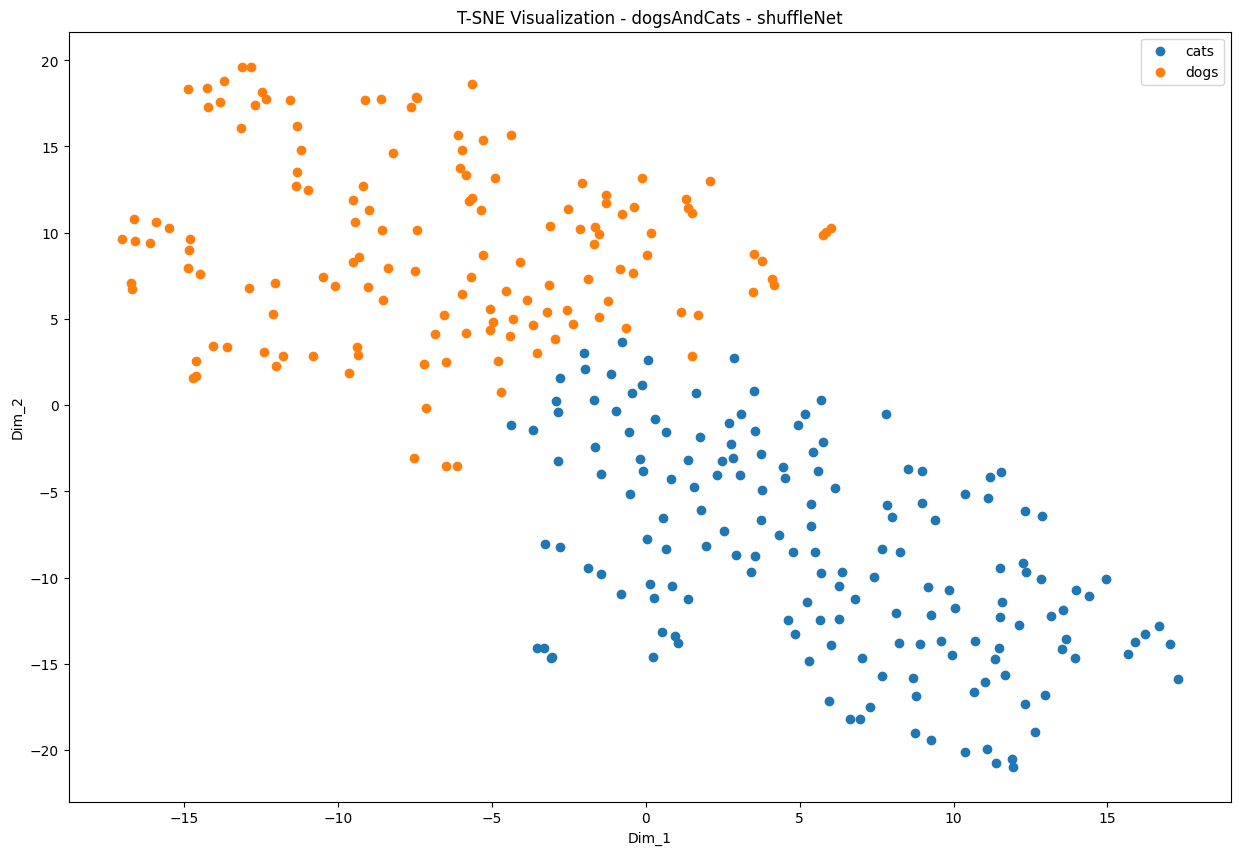

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
#Make a scatter plot with X_embedded

#TODO: Using Plt.scatter, visualize the transformed data marked with their corresponding label in 2D embedding.

classes=list(set(Y))
plt.figure(figsize=(15,10))
# cls=['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'sociatollo']
cls = ['cats', 'dogs']
for cl in classes:
    indices = np.where(Y==cl)[0]
    plt.title('T-SNE Visualization - dogsAndCats - shuffleNet')
    plt.scatter(Features_embedded[indices,0], Features_embedded[indices, 1], label=cls[cl])
    plt.ylabel('Dim_2')
    plt.xlabel('Dim_1')

plt.legend()